<H1>TITANIC</H1>

In [27]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
a=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
a.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
a.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
a.shape

(891, 12)

In [9]:
a.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
a.drop(['PassengerId','Cabin','Ticket','Embarked','Name'],inplace=True,axis=1)

In [12]:
a.Age.isnull().mean()

0.19865319865319866

In [13]:
a.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
a.Age.fillna(29.699118,inplace=True)

In [15]:
a.Age.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2c281f733d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c281f73a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c2818bcf40>],
 'medians': [<matplotlib.lines.Line2D at 0x2c281f83190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c281f83520>],
 'means': []}

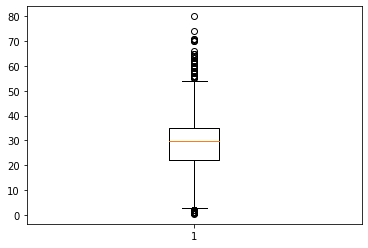

In [16]:
plt.boxplot(a.Age)

In [17]:
y=a.Survived
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [18]:
x=a[['Age','Fare']] #only these two are continuous;cont datas are alone used
print(x)

           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]


In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)
print(train_x)
print(test_x)
print(train_y)
print(test_y)

           Age      Fare
408  21.000000    7.7750
480   9.000000   46.9000
510  29.000000    7.7500
609  40.000000  153.4625
547  29.699118   13.8625
..         ...       ...
855  18.000000    9.3500
871  47.000000   52.5542
835  39.000000   83.1583
792  29.699118   69.5500
520  30.000000   93.5000

[712 rows x 2 columns]
           Age     Fare
205   2.000000  10.4625
44   19.000000   7.8792
821  27.000000   8.6625
458  50.000000  10.5000
795  39.000000  13.0000
..         ...      ...
247  24.000000  14.5000
259  50.000000  26.0000
353  25.000000  17.8000
783  29.699118  23.4500
852   9.000000  15.2458

[179 rows x 2 columns]
408    0
480    0
510    1
609    1
547    1
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 712, dtype: int64
205    0
44     1
821    1
458    1
795    0
      ..
247    1
259    1
353    0
783    0
852    0
Name: Survived, Length: 179, dtype: int64


In [20]:
model=LogisticRegression(random_state=100).fit(train_x,train_y)

In [21]:
predicted_values=model.predict(test_x)
print(predicted_values)

[0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
probability=model.predict_proba(test_x)
print(probability)

[[0.60070649 0.39929351]
 [0.6720016  0.3279984 ]
 [0.69653665 0.30346335]
 [0.76206976 0.23793024]
 [0.72133057 0.27866943]
 [0.04707281 0.95292719]
 [0.62380457 0.37619543]
 [0.61680088 0.38319912]
 [0.2575909  0.7424091 ]
 [0.64717594 0.35282406]
 [0.07074538 0.92925462]
 [0.68449456 0.31550544]
 [0.67815598 0.32184402]
 [0.73551362 0.26448638]
 [0.5828506  0.4171494 ]
 [0.68458025 0.31541975]
 [0.40958211 0.59041789]
 [0.66660978 0.33339022]
 [0.5801447  0.4198553 ]
 [0.67919745 0.32080255]
 [0.70797192 0.29202808]
 [0.26061536 0.73938464]
 [0.67140375 0.32859625]
 [0.68449456 0.31550544]
 [0.69705666 0.30294334]
 [0.70746562 0.29253438]
 [0.62069991 0.37930009]
 [0.79037507 0.20962493]
 [0.72760321 0.27239679]
 [0.67594007 0.32405993]
 [0.4767436  0.5232564 ]
 [0.64271528 0.35728472]
 [0.63707322 0.36292678]
 [0.69195501 0.30804499]
 [0.47652707 0.52347293]
 [0.69591806 0.30408194]
 [0.55887258 0.44112742]
 [0.24776601 0.75223399]
 [0.7066991  0.2933009 ]
 [0.7083682  0.2916318 ]


In [23]:
confusion_matrix(test_y,predicted_values)

array([[97,  7],
       [61, 14]], dtype=int64)

In [35]:
model.score(test_x,test_y)

0.6201117318435754

In [24]:
x.columns

Index(['Age', 'Fare'], dtype='object')

<H1>Decision Tree Classifier Model</H1>

In [31]:
decision_tree = DecisionTreeClassifier().fit(train_x,train_y)

In [32]:
predicted_values=decision_tree.predict(test_x)
print(predicted_values)

[1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1]


In [34]:
decision_tree.score(test_x,test_y)

0.6312849162011173